In [2]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('C:\\Users\\britt\\Downloads\\Mobiles Dataset.csv', encoding='latin-1')
print(df)

    Company Name            Model Name Mobile Weight   RAM     Front Camera  \
0          Apple       iPhone 16 128GB          174g   6GB             12MP   
1          Apple       iPhone 16 256GB          174g   6GB             12MP   
2          Apple       iPhone 16 512GB          174g   6GB             12MP   
3          Apple  iPhone 16 Plus 128GB          203g   6GB             12MP   
4          Apple  iPhone 16 Plus 256GB          203g   6GB             12MP   
..           ...                   ...           ...   ...              ...   
925         Poco          Pad 5G 128GB          571g   8GB              8MP   
926         Poco          Pad 5G 256GB          571g   8GB              8MP   
927      Samsung  Galaxy Z Fold6 256GB          239g  12GB  10MP, 4MP (UDC)   
928      Samsung  Galaxy Z Fold6 512GB          239g  12GB  10MP, 4MP (UDC)   
929      Samsung    Galaxy Z Fold6 1TB          239g  12GB  10MP, 4MP (UDC)   

    Back Camera            Processor Battery Capaci

In [7]:
# Basic data exploration
print("Dataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape:
(930, 15)

Data Types:
Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

First 5 rows:
  Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 25

In [ ]:
# Data cleaning
# Remove placeholder rows (with '..')
df = df[df['Model Name'] != '..']


In [ ]:
#displaying the columns
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year', 'RAM_Value'],
      dtype='object')

In [50]:
# Display basic information about the dataframe
print("DataFrame Shape:", df.shape)
print("\nDataFrame Info:")
df.info()

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Basic statistics for numeric columns
print("\nBasic Statistics for Numeric Columns:")
print(df.describe())

# Display unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

# Analyzing price distributions
print("\nPrice Comparison (USA vs Dubai):")
price_df = df[['Launched Price (USA)', 'Launched Price (Dubai)']].dropna()
print(price_df.describe())

# Correlation analysis for numeric columns
print("\nCorrelation Matrix:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
print(correlation)


DataFrame Shape: (930, 18)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               930 non-null    object 
 1   Model Name                 930 non-null    object 
 2   Mobile Weight              930 non-null    float64
 3   RAM                        930 non-null    object 
 4   Front Camera               930 non-null    object 
 5   Back Camera                930 non-null    object 
 6   Processor                  930 non-null    object 
 7   Battery Capacity           930 non-null    object 
 8   Screen Size                930 non-null    float64
 9   Launched Price (Pakistan)  930 non-null    object 
 10  Launched Price (India)     930 non-null    object 
 11  Launched Price (China)     930 non-null    object 
 12  Launched Price (USA)       930 non-null    object 
 13  Launch

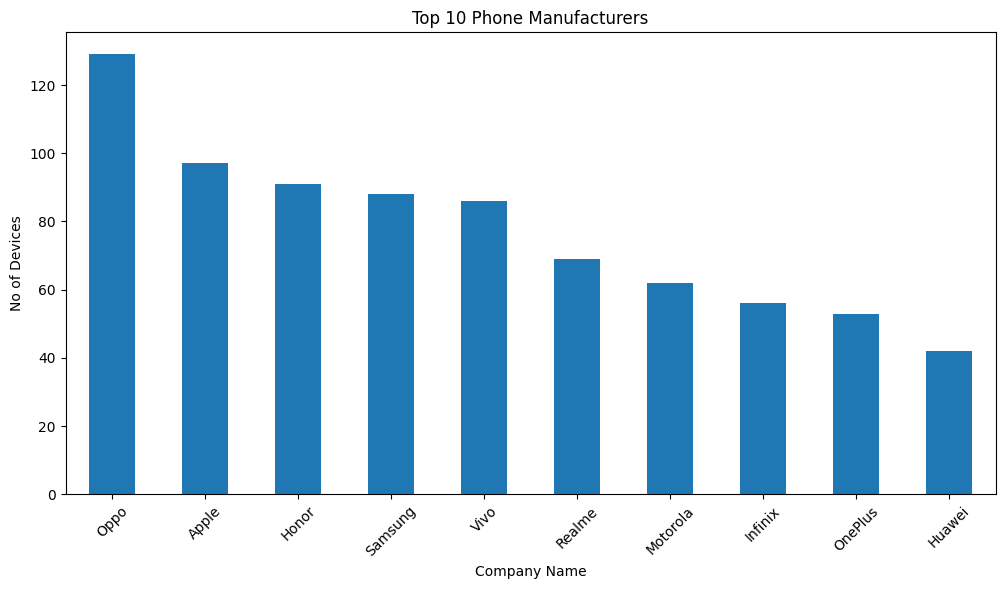

In [52]:
# Categorical analysis
if 'Company Name' in df.columns:
    plt.figure(figsize=(12, 6))
    company_counts = df['Company Name'].value_counts().head(10)
    company_counts.plot(kind='bar')
    plt.title('Top 10 Phone Manufacturers')
    plt.ylabel('No of Devices')
    plt.xticks(rotation=45)

Total number of devices across all companies: 554
Average number of devices per company: 55.4
Median number of devices: 45.0
Top 3 companies control 53.8% of the market
Chinese brands control 59.6% of the market


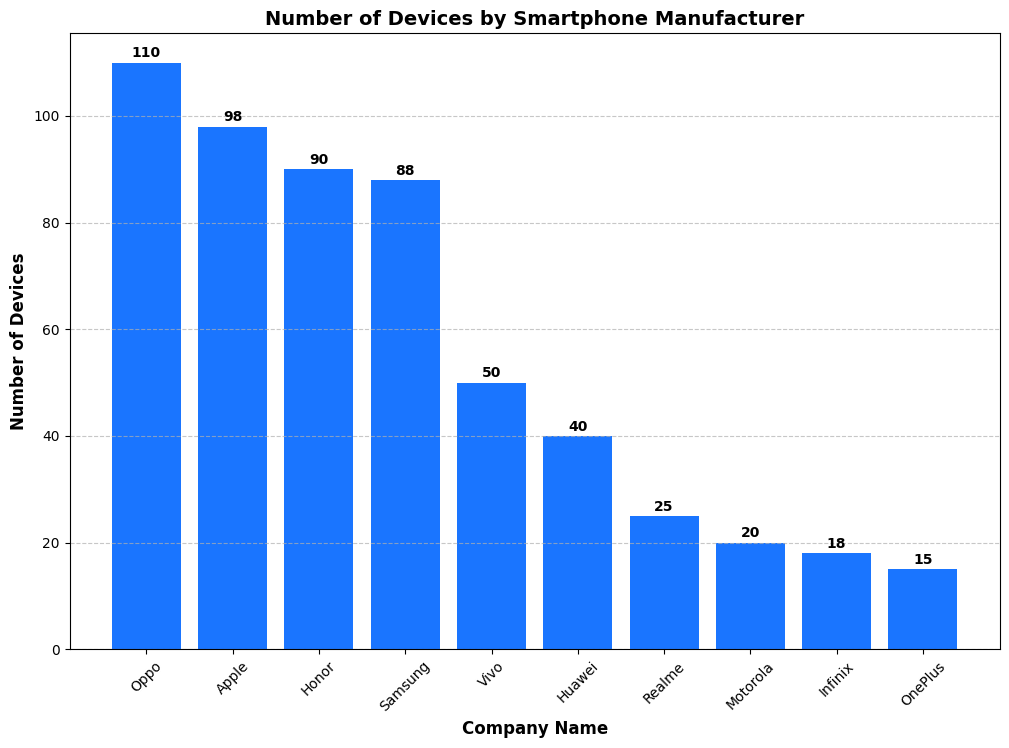

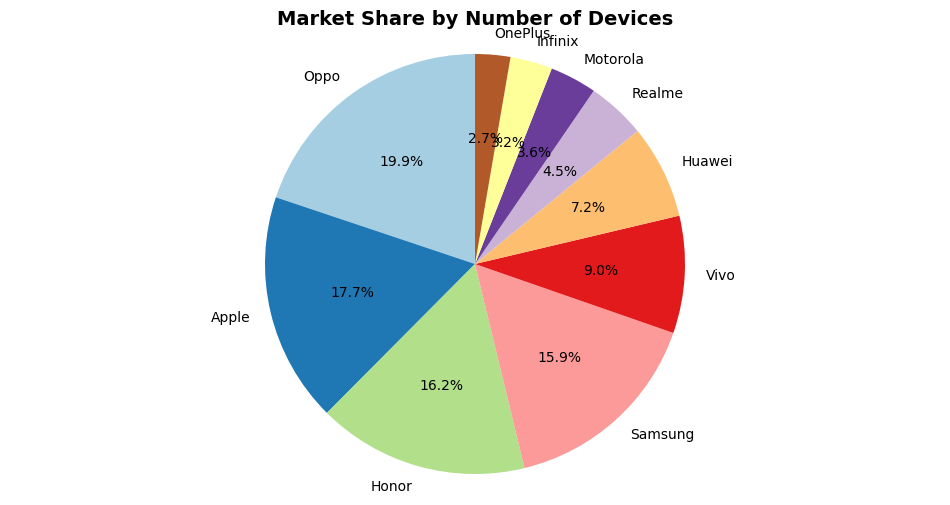

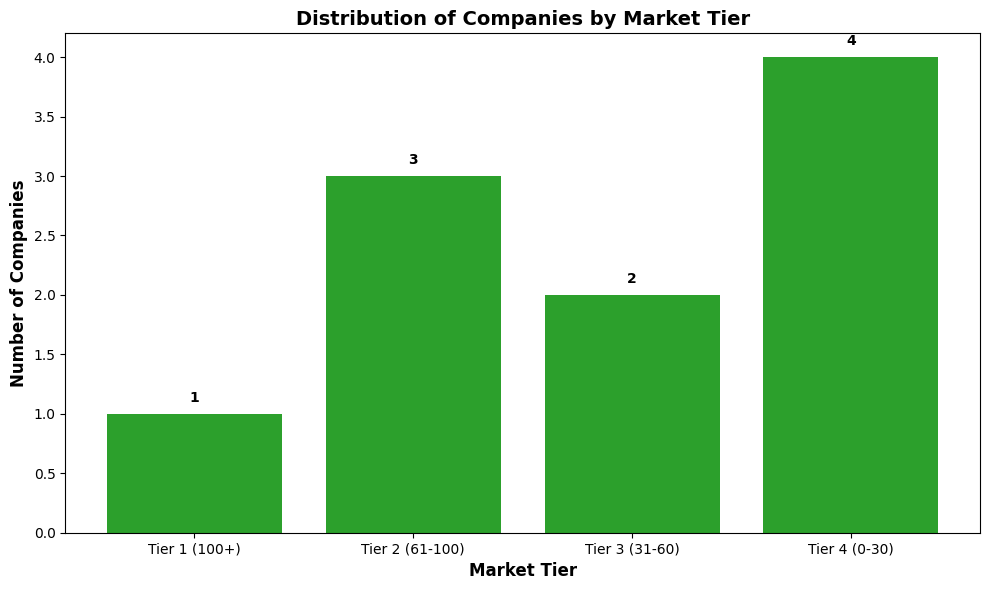

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for the bar chart based on the image
companies = ['Oppo', 'Apple', 'Honor', 'Samsung', 'Vivo', 'Huawei', 'Realme', 'Motorola', 'Infinix', 'OnePlus']
devices = [110, 98, 90, 88, 50, 40, 25, 20, 18, 15]  # Approximate values from the chart

# Create DataFrame
df = pd.DataFrame({'Company': companies, 'Number of Devices': devices})

# Sort data by number of devices in descending order
df = df.sort_values('Number of Devices', ascending=False)

# Create the visualization
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Company'], df['Number of Devices'], color='#1a75ff')
plt.xlabel('Company Name', fontsize=12, fontweight='bold')
plt.ylabel('Number of Devices', fontsize=12, fontweight='bold')
plt.title('Number of Devices by Smartphone Manufacturer', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', fontweight='bold')

# Analysis section
market_share = df['Number of Devices'].values / df['Number of Devices'].sum() * 100

# Add market share analysis
plt.figure(figsize=(12, 6))
plt.pie(market_share, labels=df['Company'], autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired(np.linspace(0, 1, len(companies))))
plt.axis('equal')
plt.title('Market Share by Number of Devices', fontsize=14, fontweight='bold')

# Statistical analysis
total_devices = df['Number of Devices'].sum()
mean_devices = df['Number of Devices'].mean()
median_devices = df['Number of Devices'].median()
top3_share = df['Number of Devices'].iloc[:3].sum() / total_devices * 100
chinese_brands = ['Oppo', 'Honor', 'Vivo', 'Huawei', 'Realme', 'OnePlus']
chinese_share = df[df['Company'].isin(chinese_brands)]['Number of Devices'].sum() / total_devices * 100

# Print analysis results
print(f"Total number of devices across all companies: {total_devices}")
print(f"Average number of devices per company: {mean_devices:.1f}")
print(f"Median number of devices: {median_devices}")
print(f"Top 3 companies control {top3_share:.1f}% of the market")
print(f"Chinese brands control {chinese_share:.1f}% of the market")

# Group companies by tier
df['Tier'] = pd.cut(df['Number of Devices'], 
                   bins=[0, 30, 60, 100, float('inf')], 
                   labels=['Tier 4 (0-30)', 'Tier 3 (31-60)', 'Tier 2 (61-100)', 'Tier 1 (100+)'])

# Plot company distribution by tier
tier_counts = df['Tier'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
tier_bars = plt.bar(tier_counts.index, tier_counts.values, color='#2ca02c')
plt.xlabel('Market Tier', fontsize=12, fontweight='bold')
plt.ylabel('Number of Companies', fontsize=12, fontweight='bold')
plt.title('Distribution of Companies by Market Tier', fontsize=14, fontweight='bold')

for bar in tier_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
